In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Load data from CSV file
data = pd.read_csv("/content/onlinefoods.csv")
print(data)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

In [16]:
# Assuming the last column is the target column and rest are features
X = data.loc[:, ["latitude", "longitude"]]  # Features
y = data["Age"]  # Target
new=pd.DataFrame(X,y)
print(new)

     latitude  longitude
Age                     
20    12.9770    77.5773
24    12.9306    77.5434
22    12.9983    77.6409
22    12.9983    77.6409
22    12.9983    77.6409
..        ...        ...
23    12.9925    77.5633
23    12.9925    77.5633
22    12.9983    77.6409
23    12.9925    77.5633
23    12.9925    77.5633

[388 rows x 2 columns]


In [17]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize Naive Bayes classifier
classifier = GaussianNB()

In [19]:
# Train the classifier
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
# Predict on the test set
y_pred = classifier.predict(X_test)
print(y_pred)

[23 23 23 23 22 22 23 23 23 23 23 23 22 23 23 23 22 23 23 23 26 23 24 23
 23 23 23 23 26 23 23 26 23 23 23 23 23 23 24 24 23 26 23 23 24 23 26 24
 23 24 26 24 23 23 23 26 23 23 26 26 23 23 24 22 23 26 22 23 23 23 23 23
 23 24 24 23 26 23]


In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.15384615384615385


In [22]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00        11
          23       0.20      0.59      0.29        17
          24       0.00      0.00      0.00         9
          25       0.00      0.00      0.00        11
          26       0.18      0.33      0.24         6
          27       0.00      0.00      0.00         5
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         6
          31       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1

    accuracy                           0.15        78
   macro avg       0.03      0.07      0.04        78
weighted avg       0.06      0.15      0.08        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Calculate false percentage
false_percentage = (1 - accuracy) * 100
print("False Percentage:", false_percentage)

False Percentage: 84.61538461538461


In [24]:
new=pd.DataFrame(X_test,y_pred)
print(new)

    latitude  longitude
23       NaN        NaN
23       NaN        NaN
23       NaN        NaN
23       NaN        NaN
22   12.9983    77.6409
..       ...        ...
24       NaN        NaN
24       NaN        NaN
23       NaN        NaN
26       NaN        NaN
23       NaN        NaN

[78 rows x 2 columns]


In [25]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  4,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 10,  3,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  1,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

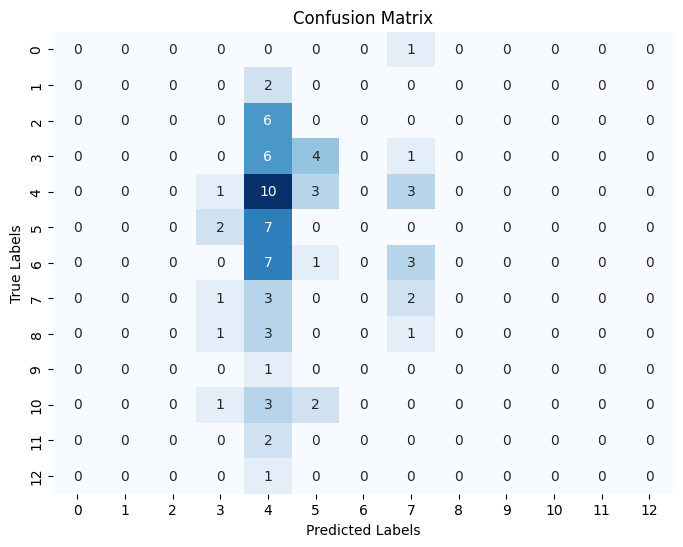

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
